Primera Parte: Importación, exploración inicial y limpieza de datos

In [3]:
# Primero importo todas las librerias necesarias y cargo el dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Carga del archivo con la ruta correcta
xls = pd.ExcelFile("../data/raw/Informe Regalias CRUDO.xlsx")

# Visualizo las hojas de cálculo para ver sobre las que voy a trabajar
print(xls.sheet_names)

['Tabla precios', 'Tabla producción', 'Tabla regalías', 'detalle de tipos de crudo']


Segunda Parte: Integración de datasets y creación del DataFrame final

In [4]:
# Cargo la hoja de REGALIAS y limpio las columnas necesarias
df_regalias = pd.read_excel(xls, sheet_name='Tabla regalías', skiprows=11)
# Cargo la hoja de PRECIOS y selecciono AÑO, MES y PRECIO
df_precios = pd.read_excel(xls, sheet_name='Tabla precios', skiprows=12)
# Cargo la hoja de PRODUCCIÓN y selecciono AÑO, MES y PRODUCCIÓN
df_produccion = pd.read_excel(xls, sheet_name='Tabla producción', skiprows=11)

# Me quedo con las tres primeras columnas: AÑO, MES y REGALIAS
df_regalias_clean = df_regalias.iloc[:, [0, 1, 2]].copy()
df_regalias_clean.columns = ['AÑO', 'MES', 'REGALIAS']
df_regalias_clean.dropna(inplace=True)

# Me quedo con las tres primeras columnas: AÑO, MES y PRECIOS
df_precios_clean = df_precios.iloc[:, [0, 1, 2]].copy()
df_precios_clean.columns = ['AÑO', 'MES', 'PRECIO']
df_precios_clean.dropna(inplace=True)

# Me quedo con las tres primeras columnas: AÑO, MES y PRODUCCIÓN
df_produccion_clean = df_produccion.iloc[:, [0, 1, 2]].copy()
df_produccion_clean.columns = ['AÑO', 'MES', 'PRODUCCION']
df_produccion_clean.dropna(inplace=True)

c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
print("Tabla de Regalías")
display(df_regalias_clean.head())
print(" ")
print("Tabla de Precios")
display(df_precios_clean.head())
print(" ")
print("Tabla de Producción")
display(df_produccion_clean.head())

Tabla de Regalías


,AÑO,MES,REGALIAS
10,1992.0,1,2704304.0
22,1993.0,1,1523582.0
34,1994.0,1,1211285.0
46,1995.0,1,1462110.0
58,1996.0,1,1128554.0


 
Tabla de Precios


,AÑO,MES,PRECIO
0,1991.0,1,0.000000
12,1992.0,1,0.000000
24,1993.0,1,321.870915
36,1994.0,1,238.987164
48,1995.0,1,317.457445


 
Tabla de Producción


,AÑO,MES,PRODUCCION
11,1992.0,1,201514.0
23,1993.0,1,126975.0
35,1994.0,1,132750.0
47,1995.0,1,121185.3
59,1996.0,1,94025.0


In [6]:
# Conversión de columnas AÑO y MES a tipo entero para evitar problemas al unir los DataFrames
# Aseguro que las columnas AÑO y MES sean enteras para que el merge funcione correctamente
df_regalias_clean['AÑO'] = df_regalias_clean['AÑO'].astype(int)
df_regalias_clean['MES'] = df_regalias_clean['MES'].astype(int)

df_precios_clean['AÑO'] = df_precios_clean['AÑO'].astype(int)
df_precios_clean['MES'] = df_precios_clean['MES'].astype(int)

df_produccion_clean['AÑO'] = df_produccion_clean['AÑO'].astype(int)
df_produccion_clean['MES'] = df_produccion_clean['MES'].astype(int)

In [7]:
# Uno regalías con precios
df_final = df_regalias_clean.merge(df_precios_clean, on=['AÑO', 'MES'], how='inner')

# Uno el resultado con producción
df_final = df_final.merge(df_produccion_clean, on=['AÑO', 'MES'], how='inner')

df_final.head()

,AÑO,MES,REGALIAS,PRECIO,PRODUCCION
0,1992,1,2704304.0,0.000000,201514.0
1,1993,1,1523582.0,321.870915,126975.0
2,1994,1,1211285.0,238.987164,132750.0
3,1995,1,1462110.0,317.457445,121185.3
4,1996,1,1128554.0,317.503888,94025.0


In [8]:
print("Columnas:", df_final.columns.tolist())
print("Cantidad de filas:", df_final.shape[0])
print("")
print("Regalías:", df_regalias_clean[['AÑO', 'MES']].drop_duplicates().shape[0])
print("Precios:", df_precios_clean[['AÑO', 'MES']].drop_duplicates().shape[0])
print("Producción:", df_produccion_clean[['AÑO', 'MES']].drop_duplicates().shape[0])

Columnas: ['AÑO', 'MES', 'REGALIAS', 'PRECIO', 'PRODUCCION']
Cantidad de filas: 34

Regalías: 34
Precios: 35
Producción: 34


In [9]:
# CARGA Y LIMPIEZA DE REGALÍAS, PRECIOS Y PRODUCCIÓN

# Hoja de Regalías
df_regalias = pd.read_excel(xls, sheet_name='Tabla regalías', skiprows=9)
df_regalias['AÑO'] = df_regalias['AÑO'].ffill()
df_regalias_clean = df_regalias.iloc[:, [0, 1, 2]].copy()
df_regalias_clean.columns = ['AÑO', 'MES', 'REGALIAS']
df_regalias_clean.dropna(inplace=True)

# Hoja de Precios
df_precios = pd.read_excel(xls, sheet_name='Tabla precios', skiprows=12)
df_precios['AÑO'] = df_precios['AÑO'].ffill()
df_precios_clean = df_precios.iloc[:, [0, 1, 2]].copy()
df_precios_clean.columns = ['AÑO', 'MES', 'PRECIO']
df_precios_clean.dropna(inplace=True)

# Hoja de Producción
df_produccion = pd.read_excel(xls, sheet_name='Tabla producción', skiprows=10)
df_produccion['AÑO'] = df_produccion['AÑO'].ffill()
df_produccion_clean = df_produccion.iloc[:, [0, 1, 2]].copy()
df_produccion_clean.columns = ['AÑO', 'MES', 'PRODUCCION']
df_produccion_clean.dropna(inplace=True)

c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\Franco\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Slicer List extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
# Convierto AÑO y MES a enteros en los tres DataFrames
df_regalias_clean['AÑO'] = df_regalias_clean['AÑO'].astype(int)
df_regalias_clean['MES'] = df_regalias_clean['MES'].astype(int)

df_precios_clean['AÑO'] = df_precios_clean['AÑO'].astype(int)
df_precios_clean['MES'] = df_precios_clean['MES'].astype(int)

df_produccion_clean['AÑO'] = df_produccion_clean['AÑO'].astype(int)
df_produccion_clean['MES'] = df_produccion_clean['MES'].astype(int)

In [11]:
# Unión de regalías con precios
df_final = df_regalias_clean.merge(df_precios_clean, on=['AÑO', 'MES'], how='inner')

# Unión con producción
df_final = df_final.merge(df_produccion_clean, on=['AÑO', 'MES'], how='inner')

# Vista preliminar
df_final.head()

,AÑO,MES,REGALIAS,PRECIO,PRODUCCION
0,1991,1,3.264605e+06,0.0,199763.752
1,1991,2,2.265274e+06,0.0,179845.700
2,1991,3,2.486990e+06,0.0,210295.119
3,1991,4,2.555041e+06,0.0,196192.877
4,1991,5,2.588931e+06,0.0,186454.620


In [12]:
print("Cantidad de filas:", df_final.shape[0])
print("Columnas:", df_final.columns.tolist())

Cantidad de filas: 420
Columnas: ['AÑO', 'MES', 'REGALIAS', 'PRECIO', 'PRODUCCION']


Tercera Parte: Análisis Exploratorio de Datos (EDA) y Entrenamiento del Modelo

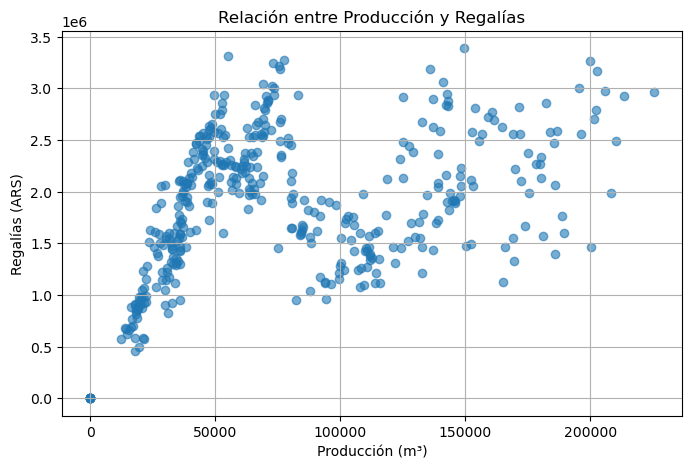

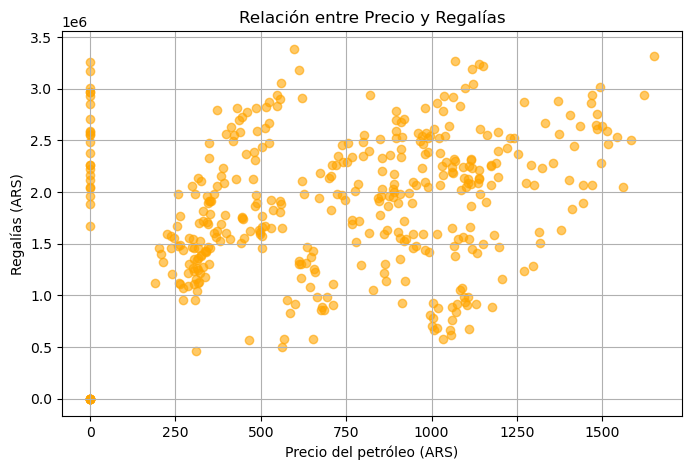

In [13]:
# Gráfico: Producción vs Regalías
plt.figure(figsize=(8, 5))
plt.scatter(df_final['PRODUCCION'], df_final['REGALIAS'], alpha=0.6)
plt.xlabel("Producción (m³)")
plt.ylabel("Regalías (ARS)")
plt.title("Relación entre Producción y Regalías")
plt.grid(True)
plt.show()
print("")
# Gráfico: Precio vs Regalías
plt.figure(figsize=(8, 5))
plt.scatter(df_final['PRECIO'], df_final['REGALIAS'], alpha=0.6, color='orange')
plt.xlabel("Precio del petróleo (ARS)")
plt.ylabel("Regalías (ARS)")
plt.title("Relación entre Precio y Regalías")
plt.grid(True)
plt.show()

In [14]:
# Defino las variables independientes (X) y la dependiente (y)
X = df_final[['PRECIO', 'PRODUCCION']]
y = df_final['REGALIAS']

# Divido los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo y entreno el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizo predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluo el modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.6164430057390045
RMSE: 441831.7366924606


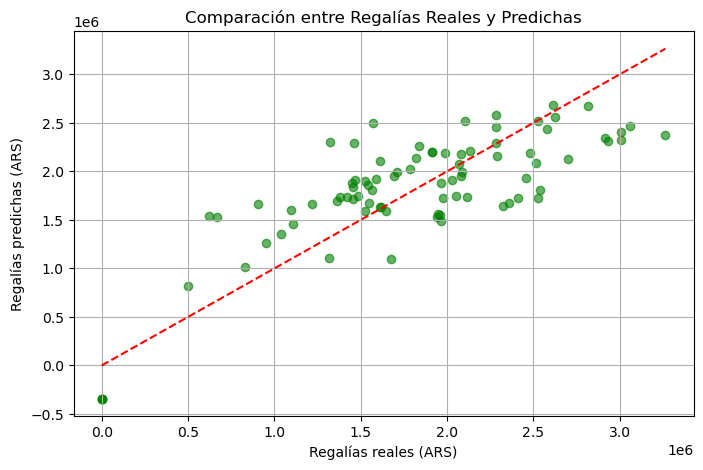

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Regalías reales (ARS)")
plt.ylabel("Regalías predichas (ARS)")
plt.title("Comparación entre Regalías Reales y Predichas")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

Parte 4: Mejora del Modelo con Ridge

In [16]:
# Creo y entreno el modelo Ridge
modelo_ridge = Ridge(alpha=1000000)
modelo_ridge.fit(X_train, y_train)

# Predicciones
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluación
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge - R² Score:", r2_ridge)
print("Ridge - RMSE:", rmse_ridge)

Ridge - R² Score: 0.6198715773235912
Ridge - RMSE: 439852.5624801023


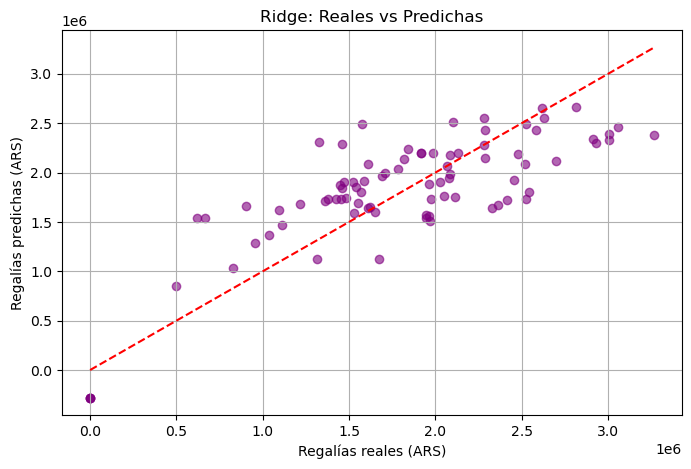

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='purple')
plt.xlabel("Regalías reales (ARS)")
plt.ylabel("Regalías predichas (ARS)")
plt.title("Ridge: Reales vs Predichas")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()